# 목차

#### 노드 실습 코드가 실행되는지 쭉 진행

#### 실험을 위한 함수 구조 작성

#### 실험 진행


## 결과

- **정면 사진의 결과**
    - 잘나옴
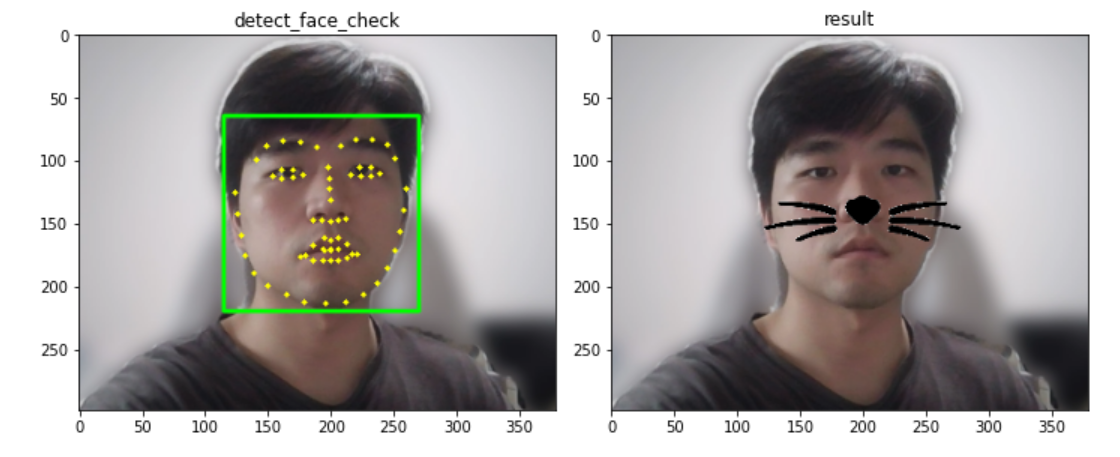


- **약간 측면 사진의 결과**
    - 꽤 잘나옴
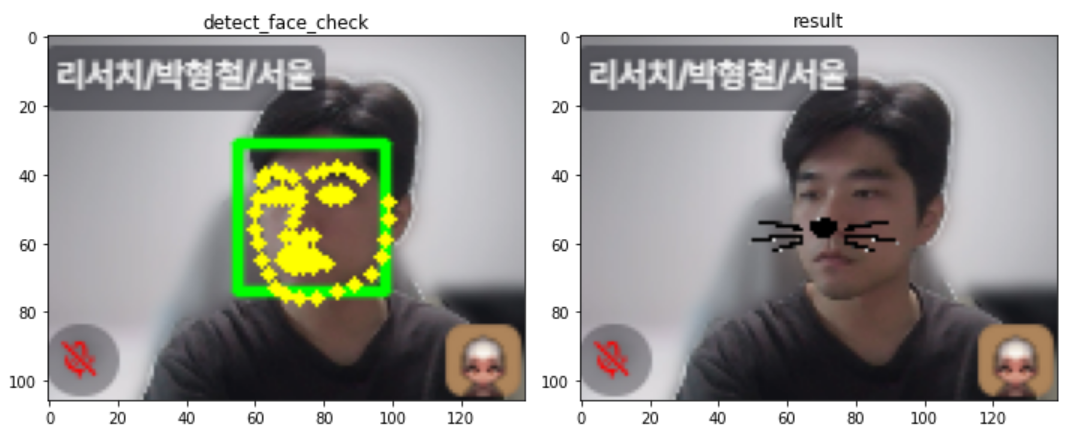

- **완전 측면 사진의 결과**
    - 인식이 아예안됨 (이때 바운딩박스가 0개일때 오류가나기때문에 코딩작업진행)
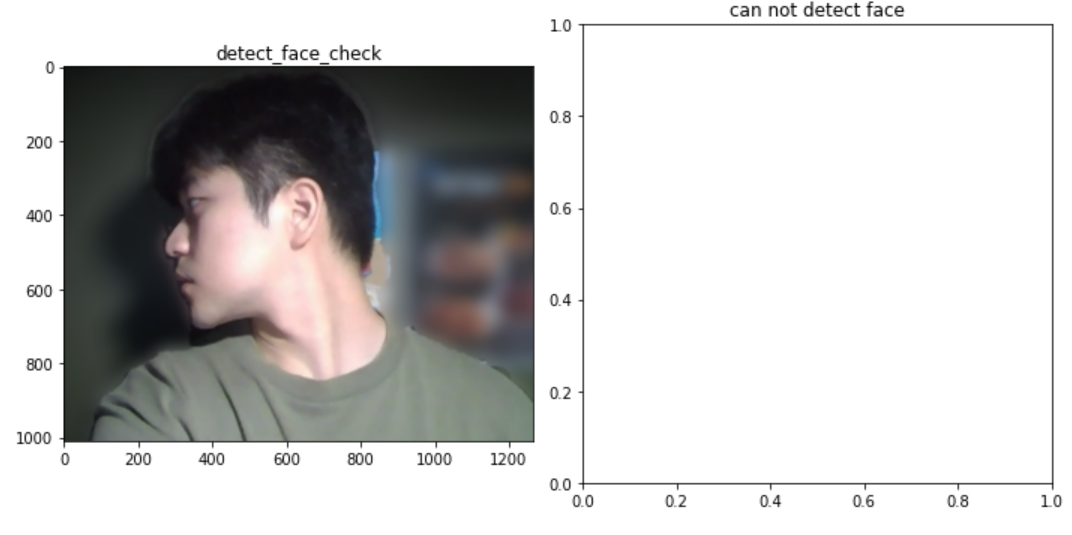

- **밝기 조절 사진의 결과(어두움)**
    - 꽤 잘됨
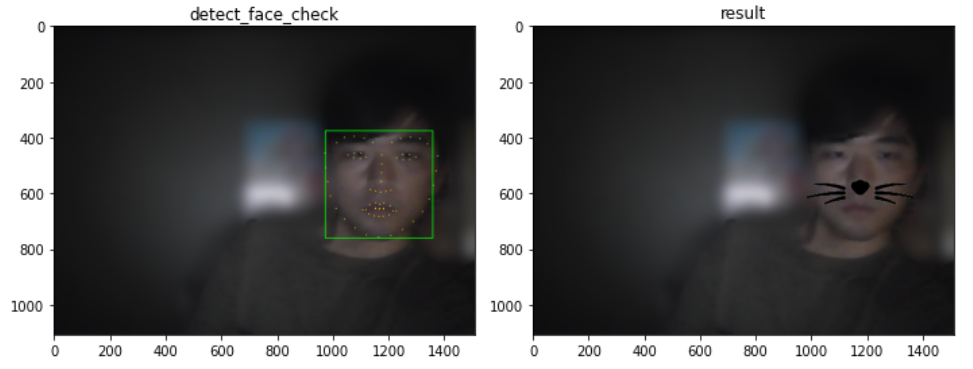

- **밝기 조절 사진의 결과(너무 밝음)**
    - 코부분이 조금 틀어짐 - 너무밝아서 경계가 모호해진상황
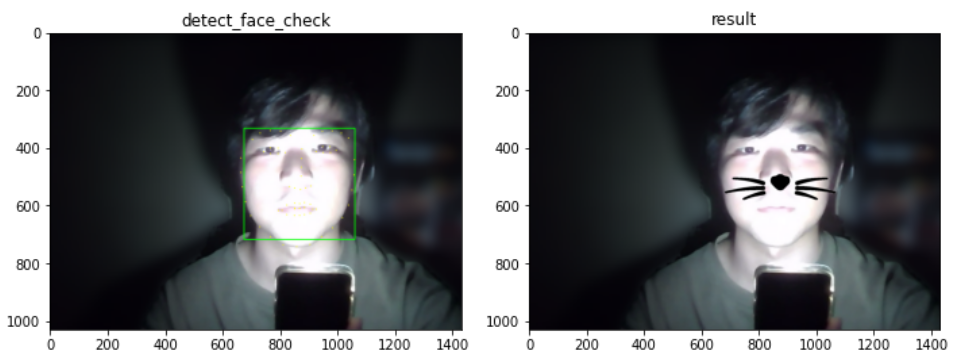

- **인형얼굴인식 가능한가?**
    - 눈썹이랑 코가없어서 인식이 안되는듯
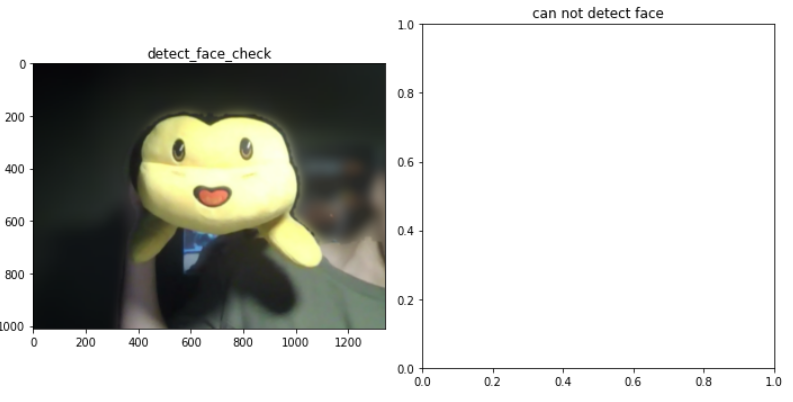

- **여러 객체 인식 실험**
    - 첫번째는 인형얼굴이 인식이 안되서 실패했다
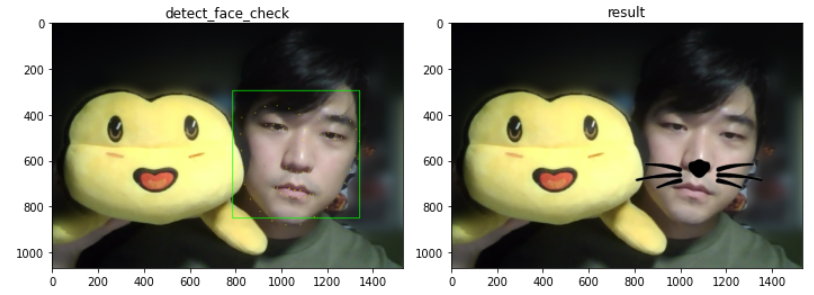
    - 여려명에서 찍었을때 얼굴인식은 되었지만 수염이 한명에게만 붙었다
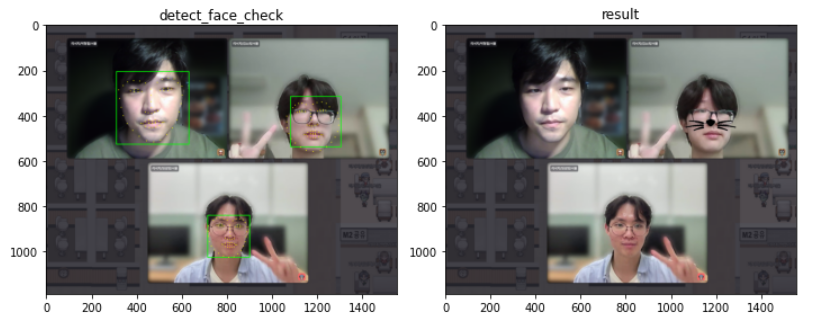

    - 모두에게 수염이 붙게 만들었다
    
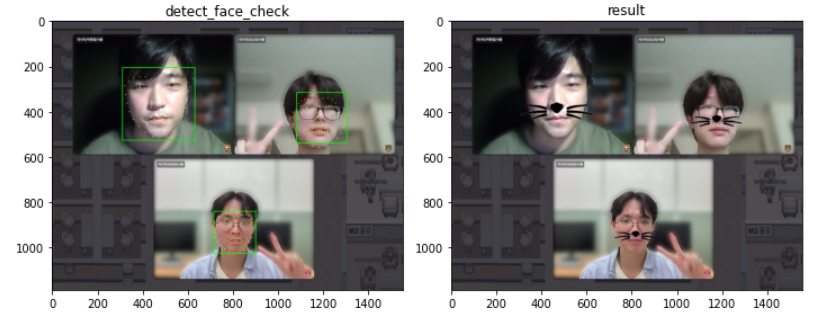


# 회고

오늘은 코드를 작성하는 시간이 조금 널널했던것같아서 여러가지 실험을 진행해 볼수있었다. 
수염을 기울이는 부분에 기술에 대해서도 궁금했는데 팀원인 성범님이 찾아서 구현해주셔서 궁금증을 해결할수있었다.
snow같이 실시간으로 얼굴을 인식하고 필터를 부여하는 기술이 멀리있지않구나 싶었다.   
  
기술적인 부분  
오늘은 함수형으로 코드를 정리해봤는데 생각보다 시간이 오래걸렸다  
함수형태로 코드를 묶어두면 디버깅을 할때 조금 불편한 감이있다 이부분에 대해서 더 나은 해결책을 알고있는 사람이 있을까?  
  
함수형태로 만들기는 했지만 안쪽에서 변수 선언이 중복되는 부분이 많다고 느껴졌다 더 컴팩트하게 정리할수는 없을까?  


In [1]:
import os
import cv2
import dlib

import matplotlib.pyplot as plt
import numpy as np

print(cv2.__version__)
print(dlib.__version__)

4.5.3
19.22.1


# 이미지 업로드

이미지는 젭에서 캡쳐한 이미지와 고양이 수염 이미지를 노트북 경로에 upload해줬다.

-> 그냥 바탕화면에있는걸 업로드했다 커맨드창을 사용하지않음

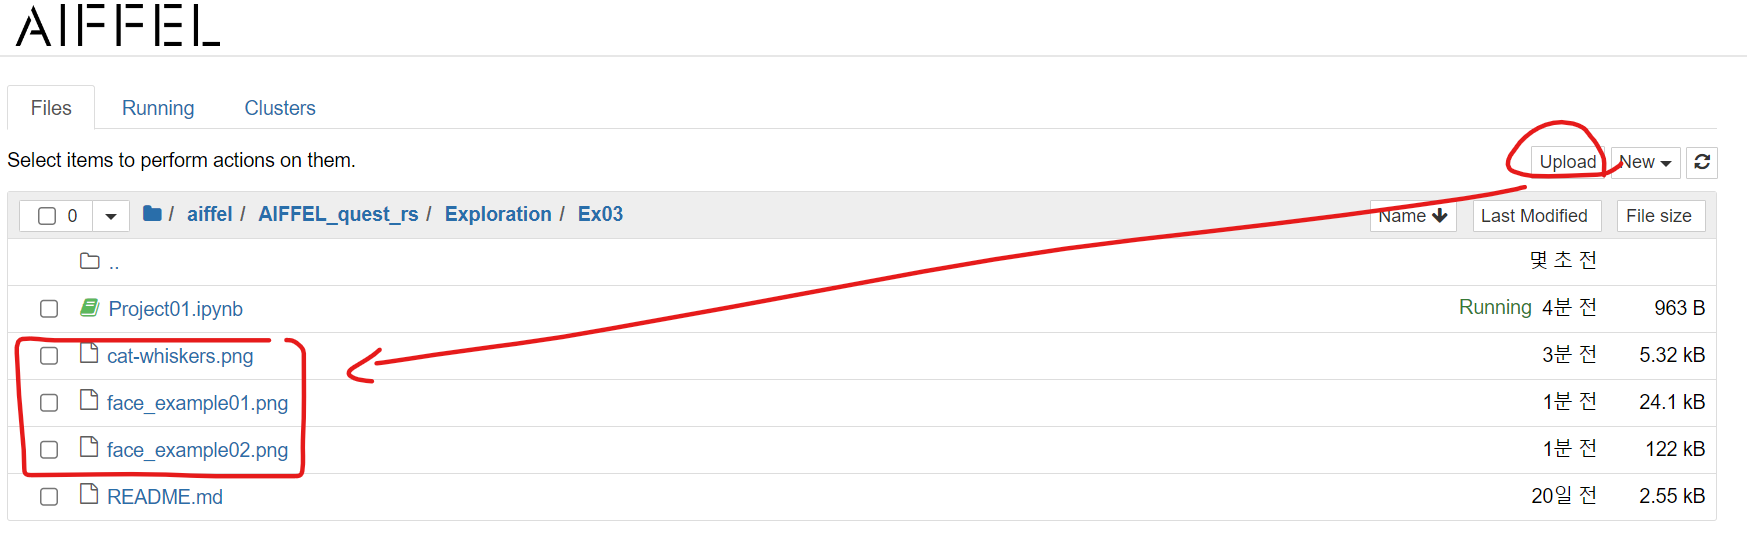

- 고양이 사진 : cat-whiskers.png
- 내 셀카 : face_example01.png (살짝 옆모습)  
- 내 셀카 : face_example02.png (정면)

## 진행 오류

아래처럼 path를 입력하니까 오류가났다
my_image_path = '/face_example02.png'

이렇게 입력하자
my_image_path = 'face_example02.png'

더 편하게 경로를 입력하는 방법은 없을까?

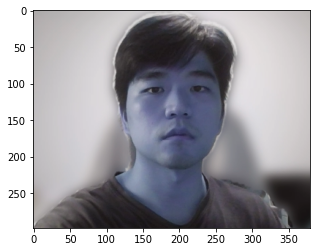

In [2]:
my_image_path = 'face_example02.png' # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path,1)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)

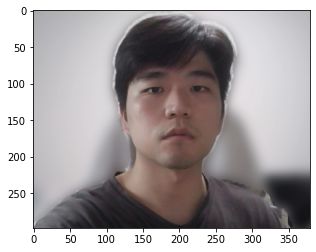

In [3]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력

In [4]:
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환

In [5]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)  

rectangles[[(115, 64) (270, 219)]]


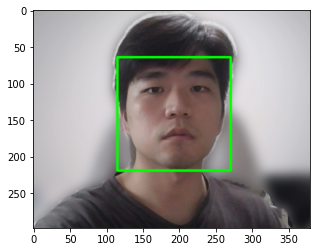

In [6]:
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 오류

:+1:

- 다운로드까지는 받아졌는데 models 폴더로 옮기면 사라진다!

    - 그냥 브라우저에서 직접 옮겨줬다

- 바로 불러오려니 또 오류 발생
    - bzip2 -d shape_predictor_68_face_landmarks.dat.bz2 
    - 압축해제를 안해줘서 발생한 문제 (dat.bz2 -> dat으로 확장자가 변화)

In [7]:
# 중복 실행안되게 주석처리

#!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
# !mkdir models
# !mv shape_predictor_68_face_landmarks.dat.bz2 /models

In [8]:
# 중복 실행안되게 주석처리
# !cd models && bzip2 -d shape_predictor_68_face_landmarks.dat.bz2

In [9]:
model_path = 'models/shape_predictor_68_face_landmarks.dat'
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄
print("🌫🛸")

🌫🛸


In [10]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list 
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


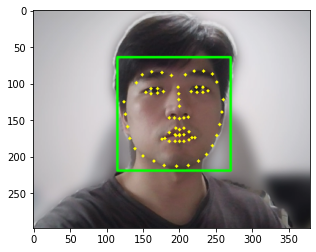

In [11]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

In [12]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# → rectangles[[(345, 98) (531, 284)]]
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))
# → [[(368, 153), (368, 174), (371, 195), (376, 215), (382, 235), (391, 252), (404, 266), (420, 277), (441, 279), (461, 276), (480, 266), (495, 252), (508, 235), (516, 216), (520, 195), (523, 173), (524, 151), (377, 131), (386, 119), (399, 116), (413, 118), (425, 124), (454, 121), (466, 114), (481, 112), (494, 114), (503, 127), (439, 143), (438, 156), (438, 169), (437, 182), (423, 197), (431, 199), (438, 200), (446, 199), (454, 197), (391, 147), (399, 142), (409, 143), (416, 149), (408, 150), (399, 150), (464, 147), (472, 141), (482, 141), (489, 145), (482, 149), (473, 149), (411, 227), (421, 222), (432, 218), (439, 220), (446, 218), (458, 222), (471, 227), (458, 234), (446, 238), (438, 238), (431, 238), (420, 235), (415, 227), (432, 227), (439, 228), (447, 227), (466, 227), (446, 228), (438, 229), (431, 228)]]

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] - dlib_rect.height()//2 # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (437, 182-(186+1//2))
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(200, 131)
(x,y) : (200,53)
(w,h) : (156,156)


## 오류

sticker_path = os.getenv('HOME')+'/cat-whiskers.png' # 수염 이미지의 경로  

이렇게 코드를 치면 오류가난다  

sticker_path = 'cat-whiskers.png' # 수염 이미지의 경로    

앞쪽에 os.getenv가 오류를 내는것같은데  
이 코드에 대한 이해가 부족한듯

In [13]:
sticker_path = 'cat-whiskers.png' # 고양이 수염 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 수염 이미지의 차원 확인

(156, 156, 3)


In [14]:
refined_x = x - w // 2 # 437 - (187//2) = 437-93 = 344
refined_y = y - h # 89-187 = -98
print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (122,-103)


In [15]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
# 왕관 이미지를 씌우기 위해 왕관 이미지가 시작할 y좌표 값 조정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] # refined_y가 -98이므로, img_sticker[98: , :]가 된다. (187, 187, 3)에서 (89, 187, 3)이 됨 (187개 중에서 98개가 잘려나감)
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (122,0)


In [16]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)

## 결과 확인

이미지 위치를 옮기지 않아서 머리위에 이미지가 합쳐진것을 볼수있다  

배경 이미지가 지워지지않았는데 무슨일일까?
- 예시로 진행한 왕관같은경우 배경이미지가 검정색으로 0이었다
- 이번 수염 이미지는 배경색이 흰색으로 255로 입력해야 배경이 대체되었다

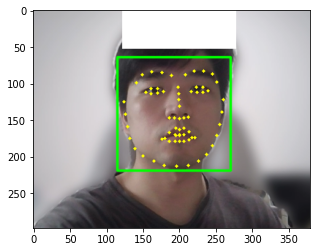

In [17]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

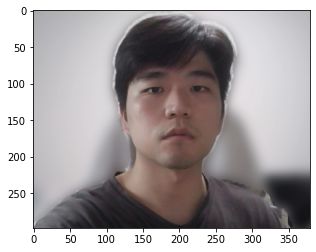

In [18]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다. 
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

# 실행용 코드 정리

### (설계 부분) - 맨밑에있는 run 부분만 실행하면되게 설계를 해보자

5개의 함수로 구성되어있다.

- my_img_load
- face_detect
- face_landmark
- attach_sticker
- run
    

In [1]:
import os
import cv2
import dlib

import matplotlib.pyplot as plt
import numpy as np

In [2]:
## 모델 다운로드 및 압축 해제

#!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
# !mkdir models
# !mv shape_predictor_68_face_landmarks.dat.bz2 models
# !cd models && bzip2 -d shape_predictor_68_face_landmarks.dat.bz2

In [24]:


# 이미지 로드후 rgb변환 및 실험용 이미지 복사 함수 만들기
def my_img_load(my_image_path):
    img_bgr = cv2.imread(my_image_path,1)    # OpenCV로 이미지를 불러옵니다
    img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    return img_show, img_rgb

def face_detect(img_rgb, img_show):
    detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
    dlib_rects = detector_hog(img_rgb, 1)  
    
    for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
        l = dlib_rect.left() # 왼쪽
        t = dlib_rect.top() # 위쪽
        r = dlib_rect.right() # 오른쪽
        b = dlib_rect.bottom() # 아래쪽
        
        cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림
        
    img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    
    return dlib_rects, img_show_rgb

def face_landmark(img_rgb, img_show, dlib_rects, model_path):
    landmark_predictor = dlib.shape_predictor(model_path)
       
    list_landmarks = []
    
    for dlib_rect in dlib_rects:
        points = landmark_predictor(img_rgb, dlib_rect)
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)


    # list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
    for landmark in list_landmarks:
        for point in landmark:
            cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            
    img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    return list_landmarks, img_show_rgb


 # 고양이 수염 이미지의 경로
def attach_sticker(sticker_path, img_rgb, dlib_rects ,list_landmarks):
    for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
        x = landmark[30][0] # 이미지에서 코 부위의 x값
        #y = landmark[30][1] - dlib_rect.height()//2 # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (437, 182-(186+1//2))
        y = landmark[30][1]
        w = h = dlib_rect.width() 
    
        img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
        img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))

        # 수염 스티커의 너비와 높이
        s_h = img_sticker.shape[0]
        s_w = img_sticker.shape[1]
    
        # 위치를 변환하는 방법 - 코에 수염의 정중앙이 오도록 배치 (살짝 코아래를 해야 괜찮아서 높이의 10퍼센트 아래로)
        refined_x = x - s_w // 2 
        refined_y = y - s_h//2 + (s_h//10)

        if refined_x < 0: 
            img_sticker = img_sticker[:, -refined_x:]
            refined_x = 0
        if refined_y < 0:
            img_sticker = img_sticker[-refined_y:, :]
            refined_y = 0

        sticker_area = img_rgb[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

        img_rgb[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
            np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8)
    
    return img_rgb

def run(my_image_path, model_path ,sticker_path):

    img_show, img_rgb = my_img_load(my_image_path)
    dlib_rects, img_show_rgb = face_detect(img_rgb, img_show)
    
    # 얼굴인식이 안되었을때 오류 메세지를 반환하면서 원본 이미지는 보이게 설정했다.
    if len(dlib_rects) == 0:
        
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))

        # 첫 번째 subplot에 이미지 표시
        axs[0].imshow(img_show_rgb)
        axs[0].set_title("detect_face_check")

        # 두 번째 subplot에 이미지 표시 (다른 이미지로 할 수 있음)
        axs[1].set_title("can not detect face")

        # 레이아웃 조정 및 출력
        plt.tight_layout()
        plt.show()
        
        return print('can not detect face')
    
    else :
        list_landmarks, img_show_rgb = face_landmark(img_rgb, img_show, dlib_rects, model_path)
        result = attach_sticker(sticker_path, img_rgb, dlib_rects ,list_landmarks)

        # 그림 띄우기
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))

        # 첫 번째 subplot에 이미지 표시
        axs[0].imshow(img_show_rgb)
        axs[0].set_title("detect_face_check")

        # 두 번째 subplot에 이미지 표시 (다른 이미지로 할 수 있음)
        axs[1].imshow(result)
        axs[1].set_title("result")

        # 레이아웃 조정 및 출력
        plt.tight_layout()
        plt.show()
    

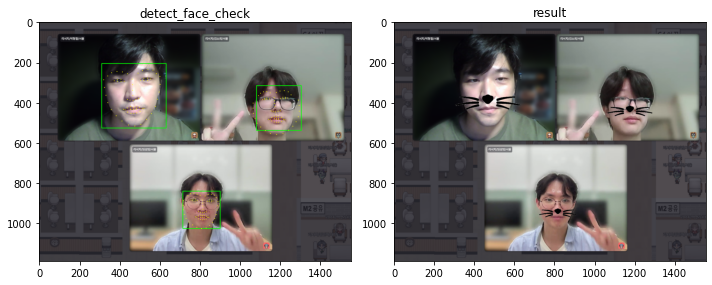

In [25]:
my_image_path = 'face_example08.png'
model_path = 'models/shape_predictor_68_face_landmarks.dat'
sticker_path = 'cat-whiskers.png'

run(my_image_path, model_path ,sticker_path)

In [ ]:
dd